In [ ]:
%matplotlib inline
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import matplotlib
import sklearn

In [ ]:
import matplotlib

In [ ]:
import seaborn as sns

In [64]:
#data = pd.read_csv('loan.csv', low_memory=False)
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
data = pd.read_csv('loan.csv', low_memory=False, index_col='id',parse_dates = date_cols, infer_datetime_format=True)

data.drop(['id', 'member_id', 'emp_title'], axis=1, inplace=True)

data.replace('n/a', np.nan,inplace=True)
print("Dataset size: {}".format(data.shape))
print(data.head())
data.emp_length.fillna(value=0,inplace=True)

data['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
data['emp_length'] = data['emp_length'].astype(int)

data['term'] = data['term'].apply(lambda x: x.lstrip())

ValueError: labels ['id'] not contained in axis

In [ ]:
# What columns do we have?
print("{} columns: {}".format(len(data.columns), data.columns))

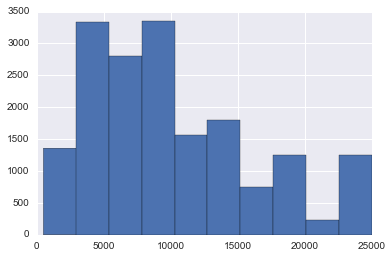

In [55]:
data['loan_amnt'].hist(bins=10) #exploratory analysis

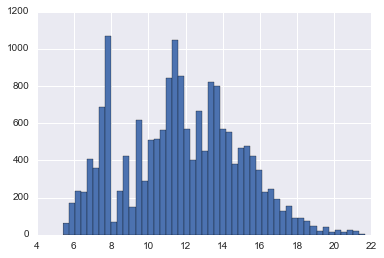

In [57]:
data['int_rate'].hist(bins=50)

/Users/owner/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x114de1a90>],
 'caps': [<matplotlib.lines.Line2D at 0x114dcde80>,
 'fliers': [<matplotlib.lines.Line2D at 0x114dc8e10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x114dd2f60>],
 'whiskers': [<matplotlib.lines.Line2D at 0x114de1c88>,
  <matplotlib.lines.Line2D at 0x114dcdd30>]}

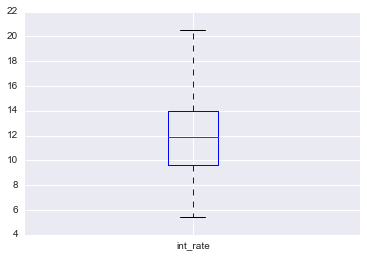

In [58]:
data.boxplot(column='int_rate')

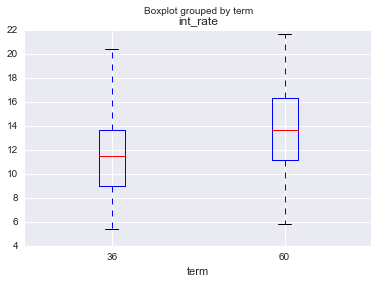

In [59]:
data.boxplot(column='int_rate', by = 'term')

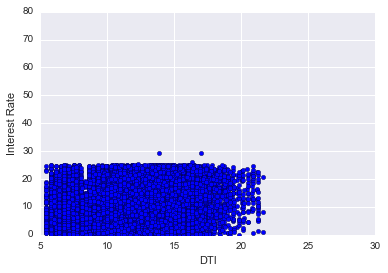

In [61]:
#Plotting interest rate vs dti. Would have expected higher DTI to have higher interest rates
plt.scatter(data.int_rate, data.dti)
plt.xlim(5,30)
plt.ylim(0,80)
plt.xlabel('DTI')
plt.ylabel('Interest Rate')

In [62]:
state_count = data.addr_state.value_counts()

state_count.plot(kind = 'bar',figsize=(16,8), title = 'Loans per State')

AttributeError: 'DataFrame' object has no attribute 'addr_state'

In [ ]:
# total missing value exploration by each column
#df.apply(lambda x: sum(x.isnull()),axis=0)
# I feel good getting around to this shit.
## I need to find all of the missing values in the dataset

In [32]:
# Let's take a look at the different columns and what data they contain
#cols = loans.columns[0:10]  # cycle through 0:10, 10:20, ...
cols = ['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length']  # or pick specific columns
print(cols)
for col in cols:
    print(data[col].describe())  # describe one by one in case of mixed types

['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length']
count    887379.000000
mean      14755.264605
std        8435.455601
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64
count         887379
unique             2
top        36 months
freq          621125
Name: term, dtype: object
count    887379.000000
mean         13.246740
std           4.381867
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: int_rate, dtype: float64
count    887379.000000
mean        436.717127
std         244.186593
min          15.670000
25%         260.705000
50%         382.550000
75%         572.600000
max        1445.460000
Name: installment, dtype: float64
count        887379
unique           12
top       10+ years
freq         291569
Name: emp_length, dtype: object


In [33]:
# Parse term durations: ' 36 months' -> 36 (numeric)
print("term before:-")
print(data.term.head())
data.term = pd.to_numeric(data.term.str[:3])
print("term after:-")
print(data.term.head())

term before:-
id
1077501     36 months
1077430     60 months
1077175     36 months
1076863     36 months
1075358     60 months
Name: term, dtype: object
term after:-
id
1077501    36
1077430    60
1077175    36
1076863    36
1075358    60
Name: term, dtype: int64


In [37]:
# Parse emp_length: '< 1 year' -> 1.0, '1 year' -> 1.0, '7 year' -> 7.0, etc. (numeric)
print("emp_length before:-")
print(data.emp_length.head())
data.emp_length = data.emp_length.str.extract("(\d+)").map(float)
print("emp_length after:-")
print(data.emp_length.head())

emp_length before:-
id
1077501    10+ years
1077430     < 1 year
1077175    10+ years
1076863    10+ years
1075358       1 year
Name: emp_length, dtype: object
emp_length after:-
id
1077501    10
1077430     1
1077175    10
1076863    10
1075358     1
Name: emp_length, dtype: float64


loan_status
Charged Off                                             45248
Current                                                601779
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Does not meet the credit policy. Status:Fully Paid       1988
Fully Paid                                             207723
In Grace Period                                          6253
Issued                                                   8460
Late (16-30 days)                                        2357
Late (31-120 days)                                      11591
Name: loan_status, dtype: int64


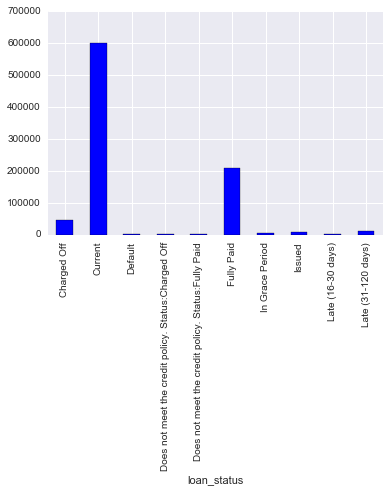

In [38]:
# What is the distribution of loans by status?
loans_by_status = data.groupby('loan_status')
print(loans_by_status['loan_status'].count())
loans_by_status['loan_status'].count().plot(kind='bar')

purpose
car                     8863
credit_card           206182
debt_consolidation    524215
educational              423
home_improvement       51829
house                   3707
major_purchase         17277
medical                 8540
moving                  5414
other                  42894
renewable_energy         575
small_business         10377
vacation                4736
wedding                 2347
Name: purpose, dtype: int64


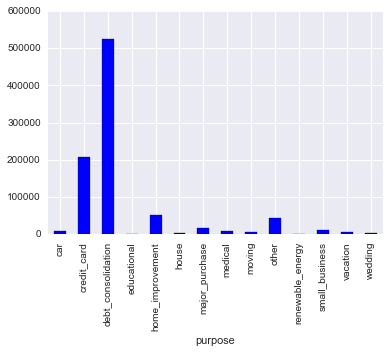

In [39]:
# What is the distribution of loans by purpose?
loans_by_purpose = data.groupby('purpose')
print(loans_by_purpose['purpose'].count())
loans_by_purpose['purpose'].count().plot(kind='bar')

term
36    621125
60    266254
Name: term, dtype: int64


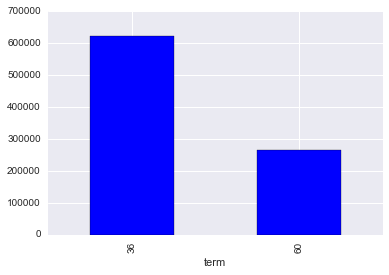

In [40]:
# What is the distribution of loans by term?
loans_by_term = data.groupby('term')
print(loans_by_term['term'].count())
loans_by_term['term'].count().plot(kind='bar')

In [41]:
#Binary Classification Task¶
#Goal: Predict loans at application stage that will default
# Select loans issued within desired date range
#loans.issue_d.describe()  # dataset range: 2007-06-01 to 2015-12-01
import datetime

#data.issue_d.fillna(value=np.nan,inplace=True)
#issue_d_todate = pd.to_datetime(data.issue_d)
#data.issue_d = pd.Series(data.issue_d).str.replace('-2015', '')
#data.emp_length.fillna(value=np.nan,inplace=True)

#data.drop(['loan_status'],1, inplace=True)

#data.drop(['pymnt_plan','url','desc','title' ],1, inplace=True)

#data.earliest_cr_line = pd.to_datetime(data.earliest_cr_line)
import datetime as dt
#data['earliest_cr_line_year'] = data['earliest_cr_line'].dt.year
#date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
#data = pd.read_csv("loan.csv", low_memory=False, index_col='id',parse_dates = date_cols, infer_datetime_format=True)

range_selected = ('2007-06-01', '2010-12-31')
loans_selected = data.loc[(range_selected[0] <= data.issue_d) & (data.issue_d<= range_selected[1])]
print("{num} loans were issued from {range[0]} to {range[1]}".format(num=len(loans_selected), range=range_selected))

# What is their distribution by status?
print(loans_selected.groupby('loan_status')['loan_status'].count())

20814 loans were issued from 2007-06-01 to 2010-12-31
loan_status
Charged Off                                             2369
Current                                                    7
Default                                                    1
Does not meet the credit policy. Status:Charged Off      761
Does not meet the credit policy. Status:Fully Paid      1988
Fully Paid                                             15681
Late (16-30 days)                                          2
Late (31-120 days)                                         5
Name: loan_status, dtype: int64


In [42]:
range_selected = ('2007-06-01', '2010-12-31')
loans_selected = data.loc[(range_selected[0] <= data.issue_d) & (data.issue_d<= range_selected[1])]
print("{num} loans were issued from {range[0]} to {range[1]}".format(num=len(loans_selected), range=range_selected))

# What is their distribution by status?
print(loans_selected.groupby('loan_status')['loan_status'].count())

20814 loans were issued from 2007-06-01 to 2010-12-31
loan_status
Charged Off                                             2369
Current                                                    7
Default                                                    1
Does not meet the credit policy. Status:Charged Off      761
Does not meet the credit policy. Status:Fully Paid      1988
Fully Paid                                             15681
Late (16-30 days)                                          2
Late (31-120 days)                                         5
Name: loan_status, dtype: int64


In [43]:
# Let's setup a binary classification target 'default': 0 => Fully Paid, 1 => Charged Off
loans_subset = loans_selected.copy()
loans_subset['default'] = None
loans_subset.loc[(loans_subset.loan_status == 'Fully Paid') | (loans_subset.loan_status == 'Does not meet the credit policy.Status:Fully Paid'), 'default'] = 0
loans_subset.loc[(loans_subset.loan_status == 'Charged Off') | (loans_subset.loan_status == 'Does not meet the credit policy.Status:Charged Off'), 'default'] = 1

# Drop loans that haven't been terminated yet (we don't know what their final status will be)
loans_subset = loans_subset[~loans_subset.default.isnull()]
print("Data subset size: {}".format(loans_subset.shape))

# Re-encode 'default' column as numeric (0 or 1)
loans_subset['default'] = pd.to_numeric(loans_subset['default'])

Data subset size: (18050, 74)


In [44]:
print(loans_subset.groupby('default')['default'].count())

default
0    15681
1     2369
Name: default, dtype: int64


In [45]:
# Specify a subset of feature columns and a target to predict ('default')
feature_cols = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'purpose',
    #'emp_title', # free text
    'emp_length', 'home_ownership',
    #'zip_code', 'addr_state',  # categorical, but too many levels
    'annual_inc', 'dti',
    'revol_bal', 'revol_util',
    'verification_status'
]

target_col = 'default'

# Create the final dataset we'll use for classification
keep_cols = feature_cols + [target_col]
data = loans_subset[keep_cols]

# Drop samples with null values (few enough that we can ignore)
data.dropna(inplace=True)

print("Final dataset: {} features, {} samples".format(len(data.columns), len(data)))
print(data.head())
print("Final class distribution (after dropping nulls):")
class_counts = data.groupby(target_col)[target_col].agg({
    'count': len,
    'ratio': lambda x: float(len(x)) / len(data)
})
print(class_counts)

# Extract desired features and target column
X = data[feature_cols]
y = data[target_col]
print("{} features: {}".format(len(X.columns), X.columns))
print("Target: {}".format(y.name))

Final dataset: 13 features, 17692 samples
        loan_amnt  term  int_rate  installment             purpose  \
id                                                                   
643218      20000    60      9.99       424.85  debt_consolidation   
642872       7475    60     13.72       172.85  debt_consolidation   
642861       5575    36     15.20       193.81      small_business   
642859       2150    60     14.83        50.96  debt_consolidation   
642857       7050    60     12.98       160.34              moving   

        emp_length home_ownership  annual_inc    dti  revol_bal  revol_util  \
id                                                                            
643218           7       MORTGAGE       45000  13.36      12761        39.5   
642872           1            OWN      145000  17.39      42581        44.8   
642861           1       MORTGAGE      120000  16.40      10611        48.0   
642859           1           RENT      120000   6.16      20020        5

/Users/owner/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [46]:
# Encode categorical variables among features
categorical_vars = ['home_ownership', 'purpose', 'verification_status']
X = pd.get_dummies(X, columns=categorical_vars)
print("{} features after encoding categorical variables: {}".format(len(X.columns), X.columns))

31 features after encoding categorical variables: Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'revol_bal', 'revol_util',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified'],
      dtype='object')


In [47]:
# Split into training and test sets
import sklearn.cross_validation
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("Training set: {} samples, test set: {} samples".format(len(X_train), len(X_test)))

Training set: 11853 samples, test set: 5839 samples


In [49]:
# Common sklearn imports
from sklearn.metrics import classification_report

# Define a simple train-predict utility function
def train_predict(clf, X_train, X_test, y_train, y_test):
    """Train clf on <X_train, y_train>, predict <X_test, y_test>; return y_pred."""
    print("Training a {}...".format(clf.__class__.__name__))
    %time clf.fit(X_train, y_train)
    print(clf)
    
    print("Predicting test labels...")
    y_pred = clf.predict(X_test)
    return y_pred

In [50]:
# Classify using a Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
y_pred = train_predict(clf, X_train, X_test, y_train, y_test)
print(classification_report(y_test, y_pred))

# Analyze feature importance
feature_imps = pd.DataFrame({'feature': X_train.columns, 'importance': clf.feature_importances_})
feature_imps.sort_values(by='importance', ascending=False, inplace=True)
print("Top 10 important features:")
print(feature_imps[:10])

Training a DecisionTreeClassifier...
CPU times: user 142 ms, sys: 5.39 ms, total: 148 ms
Wall time: 203 ms
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')
Predicting test labels...
             precision    recall  f1-score   support

          0       0.88      0.86      0.87      5125
          1       0.14      0.17      0.15       714

avg / total       0.79      0.77      0.78      5839

Top 10 important features:
                       feature  importance
6                          dti    0.136574
5                   annual_inc    0.133306
7                    revol_bal    0.133097
8                   revol_util    0.116749
3                  installment    0.114145
2                     int_rate    0.113178
0                    loan_amnt    0.060316
4        

In [51]:
# Classify using a Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_pred = train_predict(clf, X_train, X_test, y_train, y_test)
print(classification_report(y_test, y_pred))

Training a RandomForestClassifier...
CPU times: user 185 ms, sys: 1.69 ms, total: 187 ms
Wall time: 205 ms
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
Predicting test labels...
             precision    recall  f1-score   support

          0       0.88      0.99      0.93      5125
          1       0.26      0.02      0.04       714

avg / total       0.80      0.87      0.82      5839



In [52]:
# Classify using a Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, max_depth=1, learning_rate=1.0, random_state=42)
y_pred = train_predict(clf, X_train, X_test, y_train, y_test)
print(classification_report(y_test, y_pred))

Training a GradientBoostingClassifier...
CPU times: user 439 ms, sys: 5.39 ms, total: 445 ms
Wall time: 483 ms
GradientBoostingClassifier(init=None, learning_rate=1.0, loss='deviance',
              max_depth=1, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)
Predicting test labels...
             precision    recall  f1-score   support

          0       0.88      1.00      0.93      5125
          1       0.24      0.01      0.01       714

avg / total       0.80      0.88      0.82      5839

